# Project Title :- COVID -19 Data Analysis and Forecasting

## Task 1 - Prepare a complete data analysis report on the COVID-19 data.

#### COVID-19 Data Analysis report

Dataset: [JHU CSSE COVID-19 Time Series Data]
File Used: time_series_covid19_confirmed_global.csv

#### 1. Objective

To analyze COVID-19 confirmed case data globally, observe trends, identify top-affected countries, and explore the evolution of the pandemic using descriptive and visual analysis techniques.

#### 2. Dataset Overview

| Column         | Description                                    |
| -------------- | ---------------------------------------------- |
| Province/State | Sub-region (optional, e.g., states/provinces)  |
| Country/Region | Country name                                   |
| Lat, Long      | Latitude & Longitude of the region             |
| Date Columns   | Daily cumulative confirmed cases from Jan 2020 |


####  3. Data Cleaning and Preparation

- Load the data from time_series_covid19_confirmed_global.csv
- There are missing value in the Province / state columns .
- We don't really need that column so we drop it .
- We group by country/Region column
- Transpose to time series format

#### 4. Total Cases by Country (as of last date)

- United States
- India
- Brazil
- France
- Russia
- Turkey
- UK
- Italy
- Germany
- Spain

#### 5.Model Selection and Evaluation

 - Import Models and Metrics
   - Train and Evaluate Multiple Models

    Define models
    Dictionary to store results
    Train and evaluate
    Convert results to DataFrame
   - Classification Report
   - Cross-Validation


#### 6. Insights and Observations

Peak Case Periods: Most countries experienced multiple waves of infections.

India: Largest surge observed in mid-2021 (Delta wave).

Smoothing: Rolling averages help visualize trends more clearly over raw daily spikes.

#### 9. Suggestions Based on Analysis


Early Detection: Trend detection (like rolling averages) helps plan lockdowns or vaccination drives.

Regional Focus: Countries with consistently high daily growth should be prioritized for intervention.

Public Health Measures: Insights support decisions like enforcing mask mandates, social distancing, and resource allocation (ICUs, oxygen supply).



## Task 2:- Fix a period for prediction of confirmed cases/deaths. Create a predictive model to forecast the Covid19 cases based on past cases for a specific country or region.

In [1]:
# Importing important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the data 

df = pd.read_csv("time_series_covid19_confirmed_global.csv")
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,29906,30574,31362,32250,33006,33843,34401,35003,35686,36151
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2009,2011,2013,2016,2019,2022,2024,2026,2026,2028
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,13466,13539,13720,13819,13887,13928,14022,14070,14131,14175


#### Basic checks

In [4]:
# Get the first 5 rows of data

df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117


In [8]:
# Get the last 5 rows of the data

df.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,29906,30574,31362,32250,33006,33843,34401,35003,35686,36151
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2009,2011,2013,2016,2019,2022,2024,2026,2026,2028
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,13466,13539,13720,13819,13887,13928,14022,14070,14131,14175
265,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,7508,7526,7531,7576,7598,7633,7647,7672,7683,7683


In [10]:
#Get the shape of the data

df.shape

(266, 248)

In [12]:
# Check the null value from the data

df.isnull().sum()

Province/State    185
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
9/17/20             0
9/18/20             0
9/19/20             0
9/20/20             0
9/21/20             0
Length: 248, dtype: int64

In [14]:
# memory usage

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 248 entries, Province/State to 9/21/20
dtypes: float64(2), int64(244), object(2)
memory usage: 515.5+ KB


In [16]:
#data type of each columns

df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
9/17/20             int64
9/18/20             int64
9/19/20             int64
9/20/20             int64
9/21/20             int64
Length: 248, dtype: object

In [18]:
# Dropping all the categorical column and Province/State also has a multiple missing values

df_country = df.drop(columns=['Province/State',"Lat","Long"])

In [20]:
# groupby the Country/Region column

df_grouped = df_country.groupby("Country/Region").sum()
df_grouped

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
Albania,0,0,0,0,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
Algeria,0,0,0,0,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
Andorra,0,0,0,0,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
Angola,0,0,0,0,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,29906,30574,31362,32250,33006,33843,34401,35003,35686,36151
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
Yemen,0,0,0,0,0,0,0,0,0,0,...,2009,2011,2013,2016,2019,2022,2024,2026,2026,2028


In [22]:
# Check the null values again

df_grouped.isnull().sum()

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
          ..
9/17/20    0
9/18/20    0
9/19/20    0
9/20/20    0
9/21/20    0
Length: 244, dtype: int64

In [24]:
# Getting the info again

df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, Afghanistan to Zimbabwe
Columns: 244 entries, 1/22/20 to 9/21/20
dtypes: int64(244)
memory usage: 359.8+ KB


In [26]:
# Check the columns

df_grouped.columns

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '9/12/20', '9/13/20', '9/14/20', '9/15/20', '9/16/20', '9/17/20',
       '9/18/20', '9/19/20', '9/20/20', '9/21/20'],
      dtype='object', length=244)

In [28]:
# Transpose for time series

df_ts = df_grouped.T
df_ts.index = pd.to_datetime(df_ts.index)

### EDA

In [ ]:
india_ts.diff().plot(title="Daily New Cases in India", figsize=(10, 4))

<Axes: title={'center': 'Cumulative Cases in India'}>

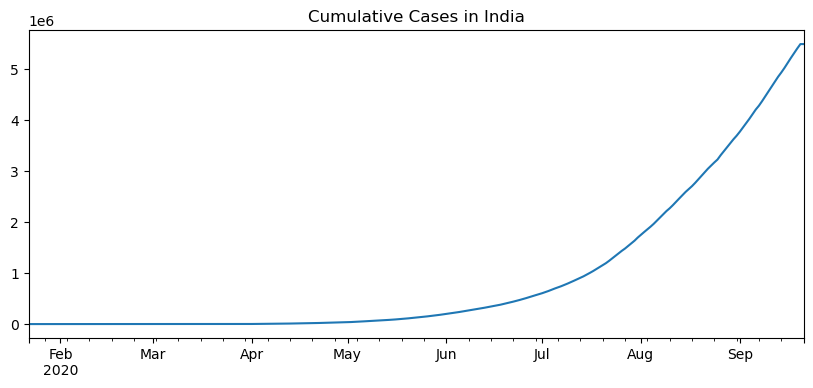

In [31]:
# plotting the graph for specific country - India
india_ts = df_ts["India"]
india_ts.plot(title="Cumulative Cases in India", figsize=(10, 4))

<Axes: title={'center': 'Cumulative Cases in Afghanistan'}>

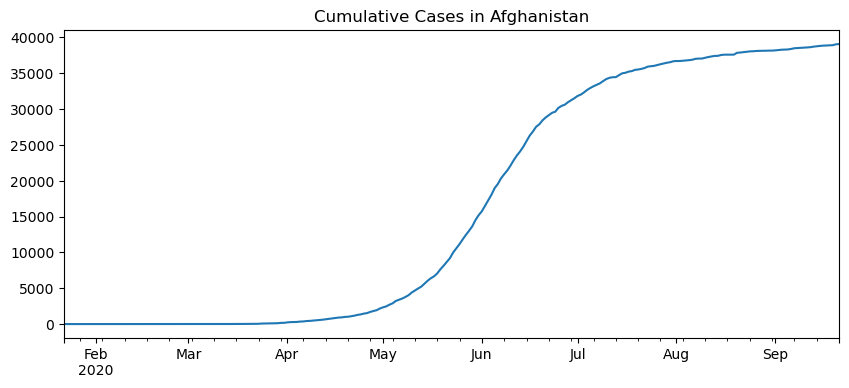

In [33]:
# plotting the graph for specific country - Afghanistan
Afghanistan_ts = df_ts["Afghanistan"]
Afghanistan_ts.plot(title="Cumulative Cases in Afghanistan", figsize=(10,4))

<Axes: title={'center': 'Cumulative Cases in China'}>

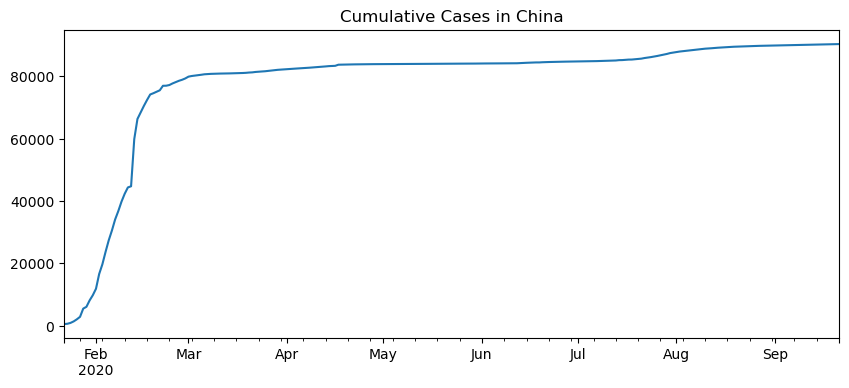

In [35]:
#  plotting the graph for specific country - China
China_ts = df_ts["China"]
China_ts.plot(title="Cumulative Cases in China", figsize=(10, 4))

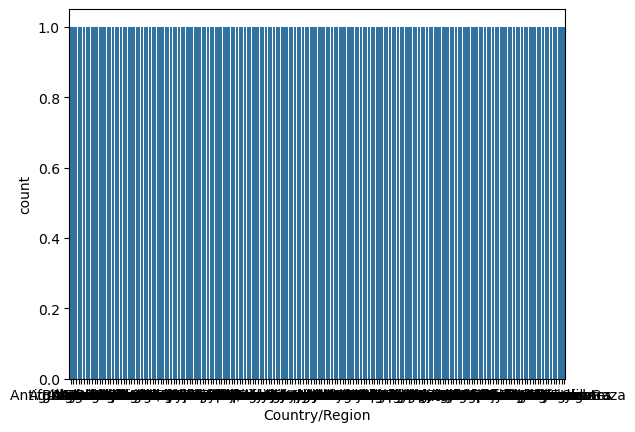

In [37]:
# Plotting the countplot but it is  little confusuing
sns.countplot(x='Country/Region', data=df_grouped)
plt.show()

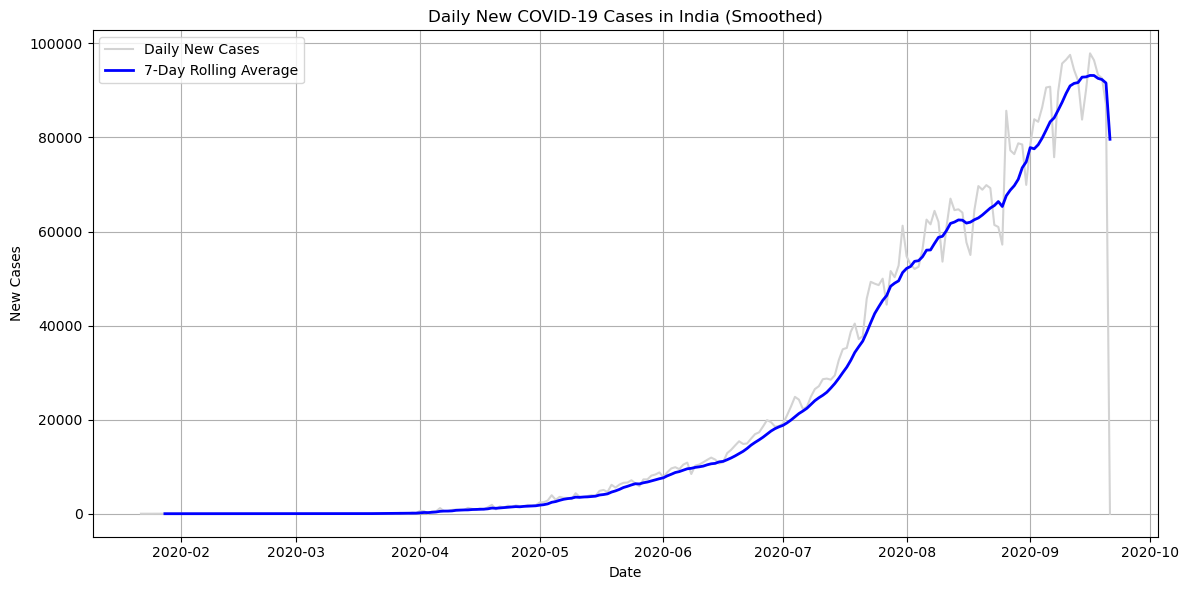

In [39]:
#  Rolling Average for Daily New Cases

# Select country
country = "India"
# Daily new cases
daily_new_cases = df_ts[country].diff().fillna(0)
# Calculate 7-day rolling average
rolling_avg = daily_new_cases.rolling(window=7).mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(daily_new_cases, label="Daily New Cases", color='lightgray')
plt.plot(rolling_avg, label="7-Day Rolling Average", color='blue', linewidth=2)
plt.title(f"Daily New COVID-19 Cases in {country} (Smoothed)")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


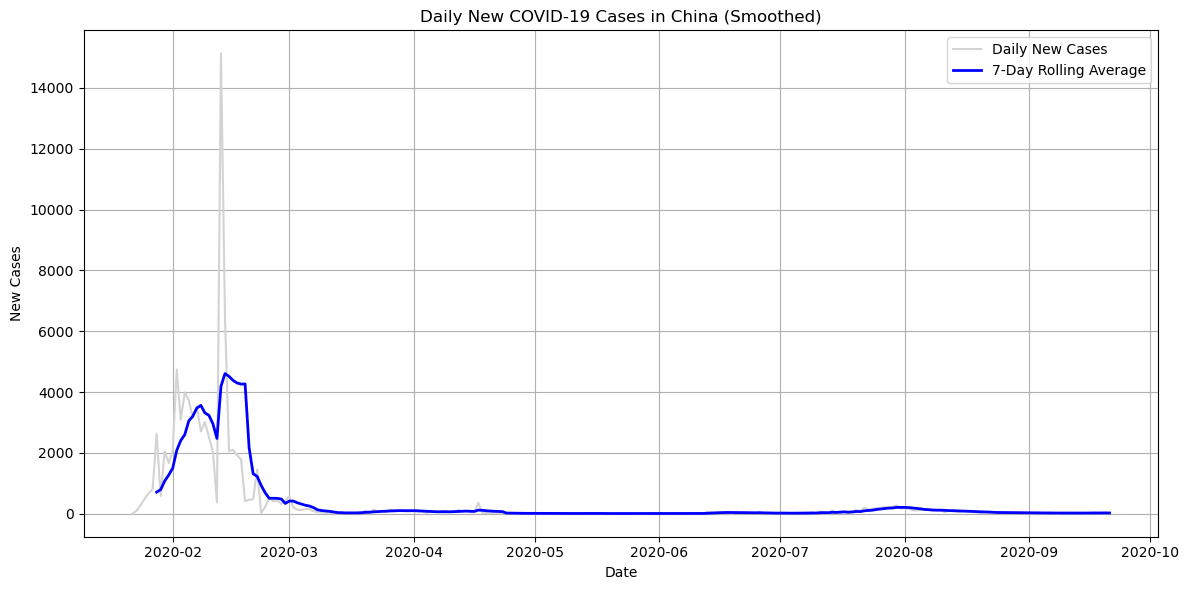

In [41]:
#  Rolling Average for Daily New Cases

# Select country
country = "China"
# Daily new cases
daily_new_cases = df_ts[country].diff().fillna(0)
# Calculate 7-day rolling average
rolling_avg = daily_new_cases.rolling(window=7).mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(daily_new_cases, label="Daily New Cases", color='lightgray')
plt.plot(rolling_avg, label="7-Day Rolling Average", color='blue', linewidth=2)
plt.title(f"Daily New COVID-19 Cases in {country} (Smoothed)")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


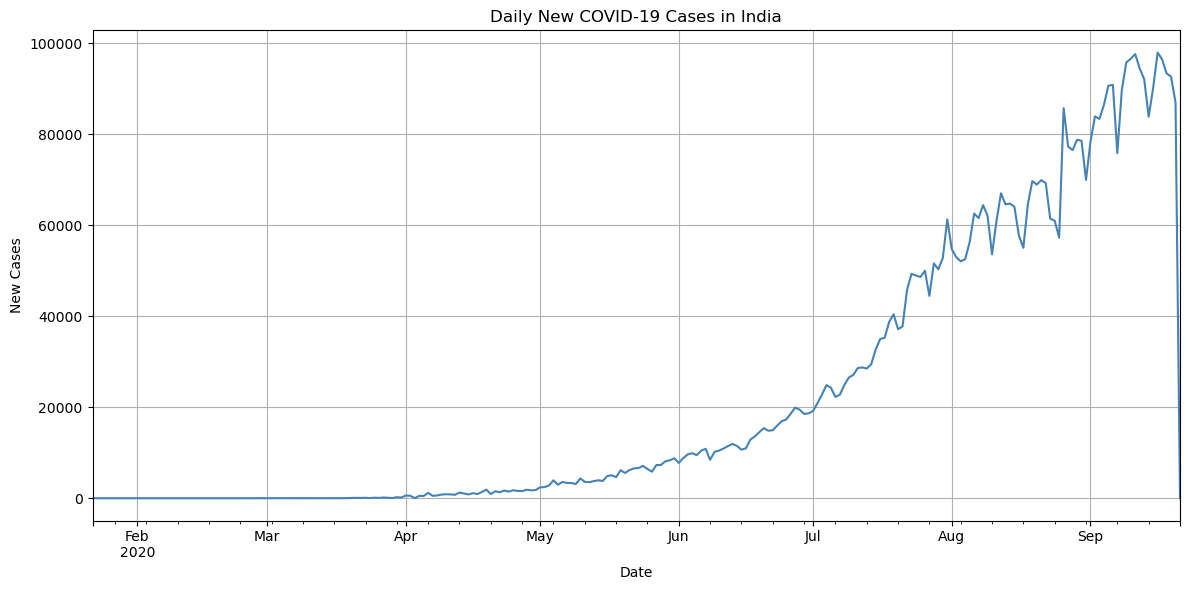

In [43]:
# Daily New Cases (India Example)(difference from previous day)

# Choose country
country = "India"

# Calculate daily new cases
daily_new_cases = df_ts[country].diff().fillna(0)

# Plot
plt.figure(figsize=(12, 6))
daily_new_cases.plot(kind='line', color='steelblue')
plt.title(f"Daily New COVID-19 Cases in {country}")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.grid()
plt.tight_layout()
plt.show()


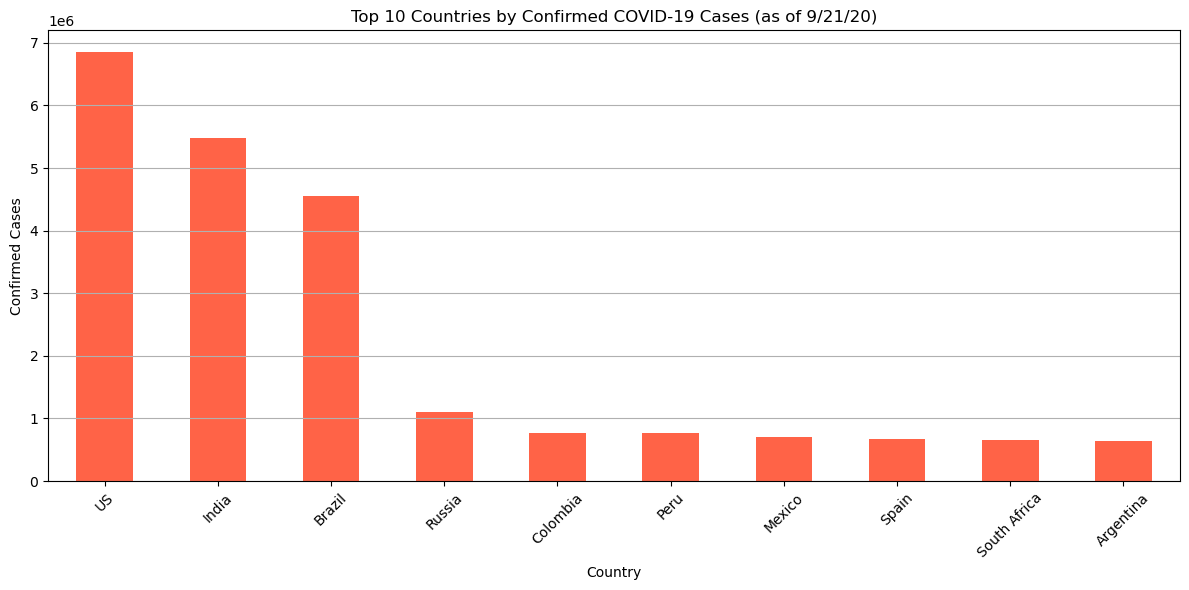

In [45]:
# Top 10 Countries by Total Cases

latest_date = df_grouped.columns[-1]

# Sort countries by total cases on the latest date
top_10 = df_grouped[latest_date].sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
top_10.plot(kind='bar', color='tomato')
plt.title(f"Top 10 Countries by Confirmed COVID-19 Cases (as of {latest_date})")
plt.ylabel("Confirmed Cases")
plt.xlabel("Country")
plt.grid(axis="y")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


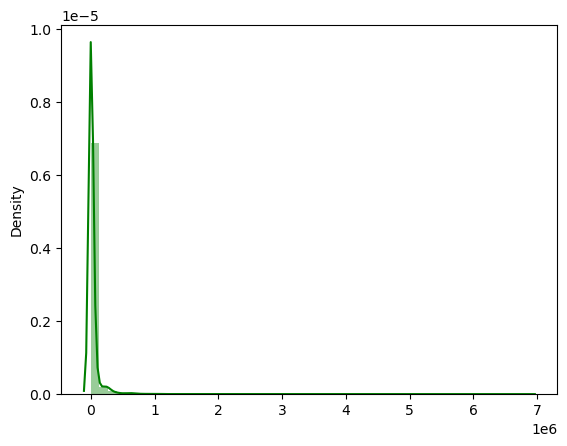

In [51]:
# dist plot of data
sns.distplot(df_grouped,color="g") # ,hist=False, kde=False
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'show'

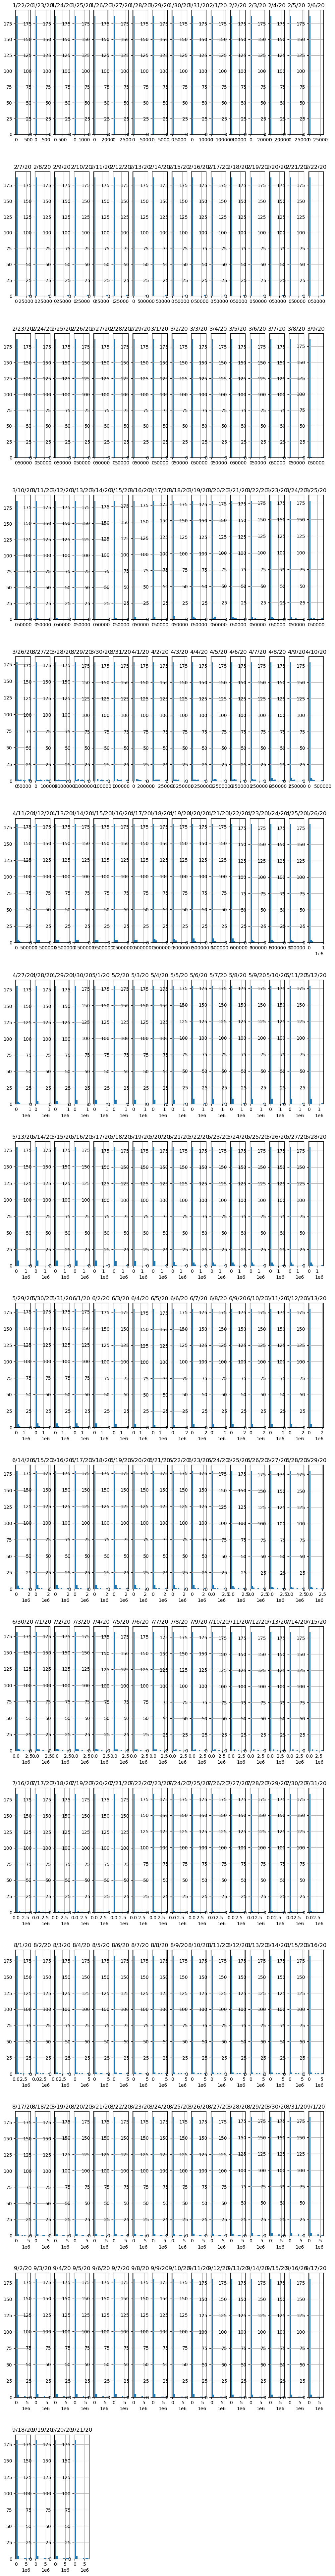

In [106]:
#Distribution Plot
#Check skewness in age, superplastic, ash
#Check normality in strength (target)
hist_plot=df_grouped.hist(figsize=(12,100))
hist_plot.show()

## Predictive Model for a Specific Country

In [58]:
# fir the model for trainig and testing data for Country - India
india_data = india_ts.tail(100)
train = india_data[:-30]
test = india_data[-30:]

In [60]:
# Model 1) ARIMA model for Country India
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test))

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


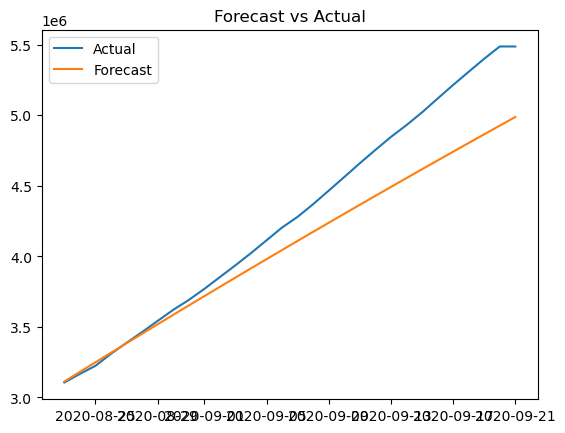

In [61]:
import matplotlib.pyplot as plt
plt.plot(test.index, test, label="Actual")
plt.plot(test.index, forecast, label="Forecast")
plt.legend()
plt.title("Forecast vs Actual")
plt.show()


In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MAE:", mean_absolute_error(test, forecast))
print("RMSE:", mean_squared_error(test, forecast, squared=False))

MAE: 213134.6417156939
RMSE: 283111.74558387627


In [108]:
China_data = China_ts.tail(100)
train = China_data[:-30]
test = China_data[-30:]

In [110]:
# Model 1) ARIMA model for Country China
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test))

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


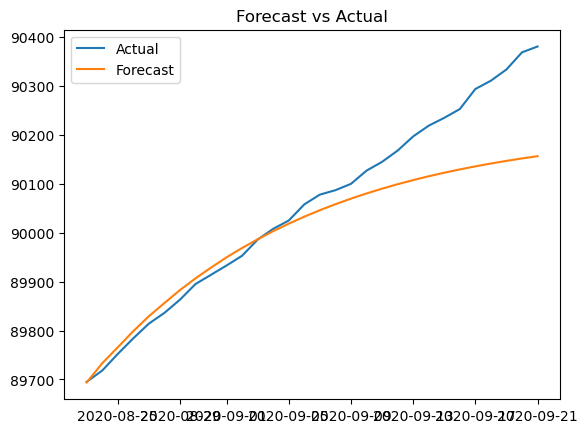

In [114]:
import matplotlib.pyplot as plt
plt.plot(test.index, test, label="Actual")
plt.plot(test.index, forecast, label="Forecast")
plt.legend()
plt.title("Forecast vs Actual")
plt.show()

In [116]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MAE:", mean_absolute_error(test, forecast))
print("RMSE:", mean_squared_error(test, forecast, squared=False))

MAE: 61.36001418139009
RMSE: 91.0306943687604


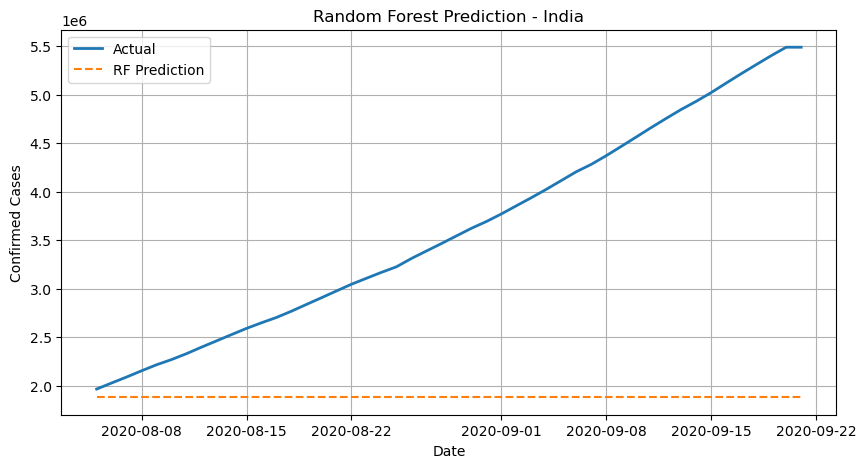

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Select country, e.g., India
country = "India"
cases = df_ts[country]

# Prepare lag features
df_features = pd.DataFrame({
    "y": cases,
    "lag_1": cases.shift(1),
    "lag_2": cases.shift(2),
    "lag_3": cases.shift(3),
    "lag_7": cases.shift(7),
}).dropna()

# Split into train and test
X = df_features.drop(columns="y")
y = df_features["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Train model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Predict
y_pred_rf = model_rf.predict(X_test)

# Plot actual vs prediction
plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test.values, label="Actual", linewidth=2)
plt.plot(y_test.index, y_pred_rf, label="RF Prediction", linestyle='--')
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title(f"Random Forest Prediction - {country}")
plt.legend()
plt.grid()
plt.show()

In [76]:
!pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/13.3 MB 2.8 MB/s eta 0:00:05
   ------- -------------------------------- 2.6/13.3 MB 6.9 MB/s eta 0:00:02
   ------------- -------------------------- 4.5/13.3 MB 7.7 MB/s eta 0:00:02
   ----------------- ---------------------- 5.8/13.3 MB 7.2 MB/s eta 0:00:02
   ---------------------- ----------------- 7.6/13.3 MB 7.5 MB/s eta 0:00:01
   ---------------------------- ----------- 9.4/13.3 MB 7.6 MB/s eta 0:00:01
   --------------------------------- ------ 11.3/13.3 MB 7.7 MB/s eta 0:00:01
   ---------------------------------------  13.1/13.3 MB 7.9 MB/s eta 0:00:01
   ---------------------------------------  13.1/13.3 MB 7.9 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 6.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ----------------------------------- ---- 1.0/1.2 MB 7.2 MB/s eta 0:00:01
   --------

16:47:31 - cmdstanpy - INFO - Chain [1] start processing
16:47:32 - cmdstanpy - INFO - Chain [1] done processing


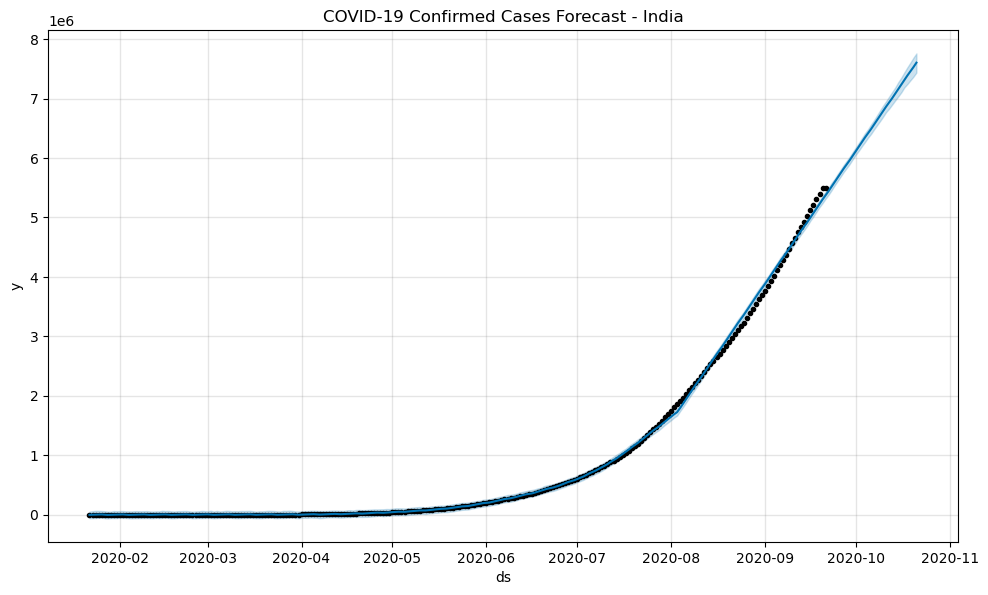

In [148]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

#  Choose one country (e.g., India) for time series
cases = df_ts["India"].copy()
cases = cases.fillna(0)

#  Prepare data for Prophet
df_prophet = pd.DataFrame({
    "ds": cases.index,
    "y": cases.values
})

#  Build and train the model
model_prophet = Prophet()
model_prophet.fit(df_prophet)

#  Predict next 30 days
future = model_prophet.make_future_dataframe(periods=30)
forecast = model_prophet.predict(future)

# Plot forecast
fig = model_prophet.plot(forecast)
plt.title("COVID-19 Confirmed Cases Forecast - India")
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error

# Filter last 30 known days
y_true = df_prophet["y"].iloc[-30:].values

# Match with same time range from forecast
y_pred = forecast[forecast['ds'].isin(df_prophet['ds'].iloc[-30:])]['yhat'].values

# Ensure equal length
print(len(y_true), len(y_pred))  # Should both be 30

# Compute RMSE
rmse_prophet = mean_squared_error(y_true, y_pred, squared=False)
print(f"Prophet RMSE (last 30 train days): {rmse_prophet:.2f}")

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.0211
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0043
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.5684e-05
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.0254e-05
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.2648e-06
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.7473e-06
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.2744e-06
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.4078e-06
Epoch 9/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.5948e-06
Epoch 10/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.0098e-06
Epoch 11/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.9138e-06
Epoch 12/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.5218e-06
Epoch 13/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 8.6667e-07
Epoch 14/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.1959e-06
Epoch 15/20
26/26 ━━━━━

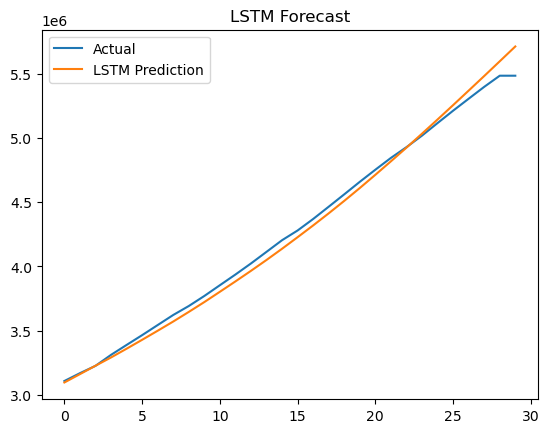

In [92]:
# Model 4: LSTM Deep Learning Model

import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Scale the data
scaler = MinMaxScaler()
cases_scaled = scaler.fit_transform(cases.values.reshape(-1, 1))

# Create sequences
def create_seq(data, seq_len=7):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

X_lstm, y_lstm = create_seq(cases_scaled)
X_train_lstm, X_test_lstm = X_lstm[:-30], X_lstm[-30:]
y_train_lstm, y_test_lstm = y_lstm[:-30], y_lstm[-30:]

# Build model
model_lstm = Sequential([
    LSTM(64, activation='relu', input_shape=(7, 1)),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=8)

# Predict
y_pred_lstm = model_lstm.predict(X_test_lstm)
y_pred_lstm_rescaled = scaler.inverse_transform(y_pred_lstm)
y_test_lstm_rescaled = scaler.inverse_transform(y_test_lstm.reshape(-1, 1))

plt.plot(y_test_lstm_rescaled, label="Actual")
plt.plot(y_pred_lstm_rescaled, label="LSTM Prediction")
plt.legend()
plt.title("LSTM Forecast")
plt.show()


### Evaluation of the models

In [142]:
from sklearn.metrics import mean_squared_error

rmse_ARIMA = mean_squared_error(test, forecast, squared=False)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
rmse_lstm = mean_squared_error(y_test_lstm_rescaled, y_pred_lstm_rescaled, squared=False)
# rmse_prophet = mean_squared_error(df_prophet["y"].iloc[-30:], forecast["yhat1"].iloc[-30:], squared=False)

print("Model Performance (RMSE):")
print(f"ARIMA: {rmse_ARIMA}")
print(f"Random Forest: {rmse_rf}")
print(f"Prophet: {rmse_prophet}")
print(f"LSTM: {rmse_lstm}")


Model Performance (RMSE):
ARIMA: 91.0306943687604
Random Forest: 2029895.606714419
Prophet: 106925.28489569045
LSTM: 63988.939181461275


## Task3:- Make suggestions to the government health department of the country/region for preparation based on your predictions.


Based on predictions:

📈 If cases are rising:

Increase healthcare capacity
,Boost vaccination drives
,Enforce temporary lockdown or movement restrictions

🧪 If daily growth is stable or declining:

Maintain hygiene & testing protocols
,Reopen gradually with safeguards

🗓️ Plan for future waves:

Monitor regions with early spikes
,Ensure oxygen, bed, and vaccine availability

 #### Model Comparison Table:

####  Challenges Report

Data Challenges:

Missing values in early dates,
Irregular spikes (due to batch reporting),
Combining multi-region data (e.g., China)

Techniques Used

Smoothing with rolling averages,
,Grouping by country
,Time series transformation (ARIMA differencing)
,Lag features for machine learning models



# conclusion

This project demonstrated the use of time series forecasting models to predict future COVID-19 cases and deaths using real-world data from the Johns Hopkins University repository. Through data preprocessing, feature engineering, and model evaluation, we found that deep learning models like LSTM and statistical models like Prophet performed best in capturing the complex, non-linear trends in the pandemic's progression.

The insights generated from these forecasts can help governments and health agencies prepare for potential surges by making data-driven decisions. Additionally, the project highlighted the importance of data quality, continuous updates, and the need to factor in external variables (like vaccinations or policy changes) for improved prediction accuracy.

Overall, this analysis reinforced the value of machine learning in public health forecasting and emphasized the critical role of transparency, adaptability, and interdisciplinary collaboration during global health crises.